In [ ]:
#Name: Faizan Saleem Siddiqui
#Department of Electronics: Quaid-i-Azam University, Islamabad




# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* Name: Faizan Saleem Sidddiqui
* Department of Electronics, Quaid-i-Azam University.
* Subject: EL-470 Digital Image Processing

This is my Project for the Subject of "Digital Imagge Processing" , part of Electronics Engineering. In this project, I have designed,a CNN Model that predicts and classifies the images. The model classafies images in to 6 classess: 
* Building
* Forrest
* Mountain
* Glacier
* Sea
* Street

This model takse total of 14000 Images classified into 6 classes. Where each class contains on average 2200 Images. These images are part of training dataset.
The testing dataset contains 3000 Images and Validation data contains 7000 Images.
So the entire dataset contains 20000+ Images.

**Lets Begin**

In this section all relevant libraries are imported

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

Path To Datasets are initialized.

In [8]:
train_dataset_path = '/kaggle/input/intel-image-classification/seg_train/seg_train/'
validation_dataset_path = '/kaggle/input/intel-image-classification/seg_test/seg_test/'

In the following cell, the height and width of image is defined. Also the number of images per batches is also defined.

In [9]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

This code defines an image data generator (`train_datagen`) with various augmentations such as rescaling, zooming, and shifting. It is then used to create a generator (`train_generator`) for loading and augmenting images from a specified directory (`train_dataset_path`) with a specified target size, batch size, categorical class mode, and shuffling during training. This is commonly used in deep learning for enhancing model generalization by generating diverse training samples.

In [10]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 14034 images belonging to 6 classes.


This code establishes an image data generator (`validation_datagen`) with rescaling as the only transformation. It is then utilized to create a generator (`validation_generator`) for loading images from a specified directory (`validation_dataset_path`). The generator resizes images to a target size, organizes them into batches, employs categorical class mode, and shuffles the data for validation purposes. This setup is common in deep learning to preprocess and augment validation data similarly to training data.

In [11]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 3000 images belonging to 6 classes.


In this cell, we assign integer labels to the classes.

In [12]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


Here we are displaying some images.

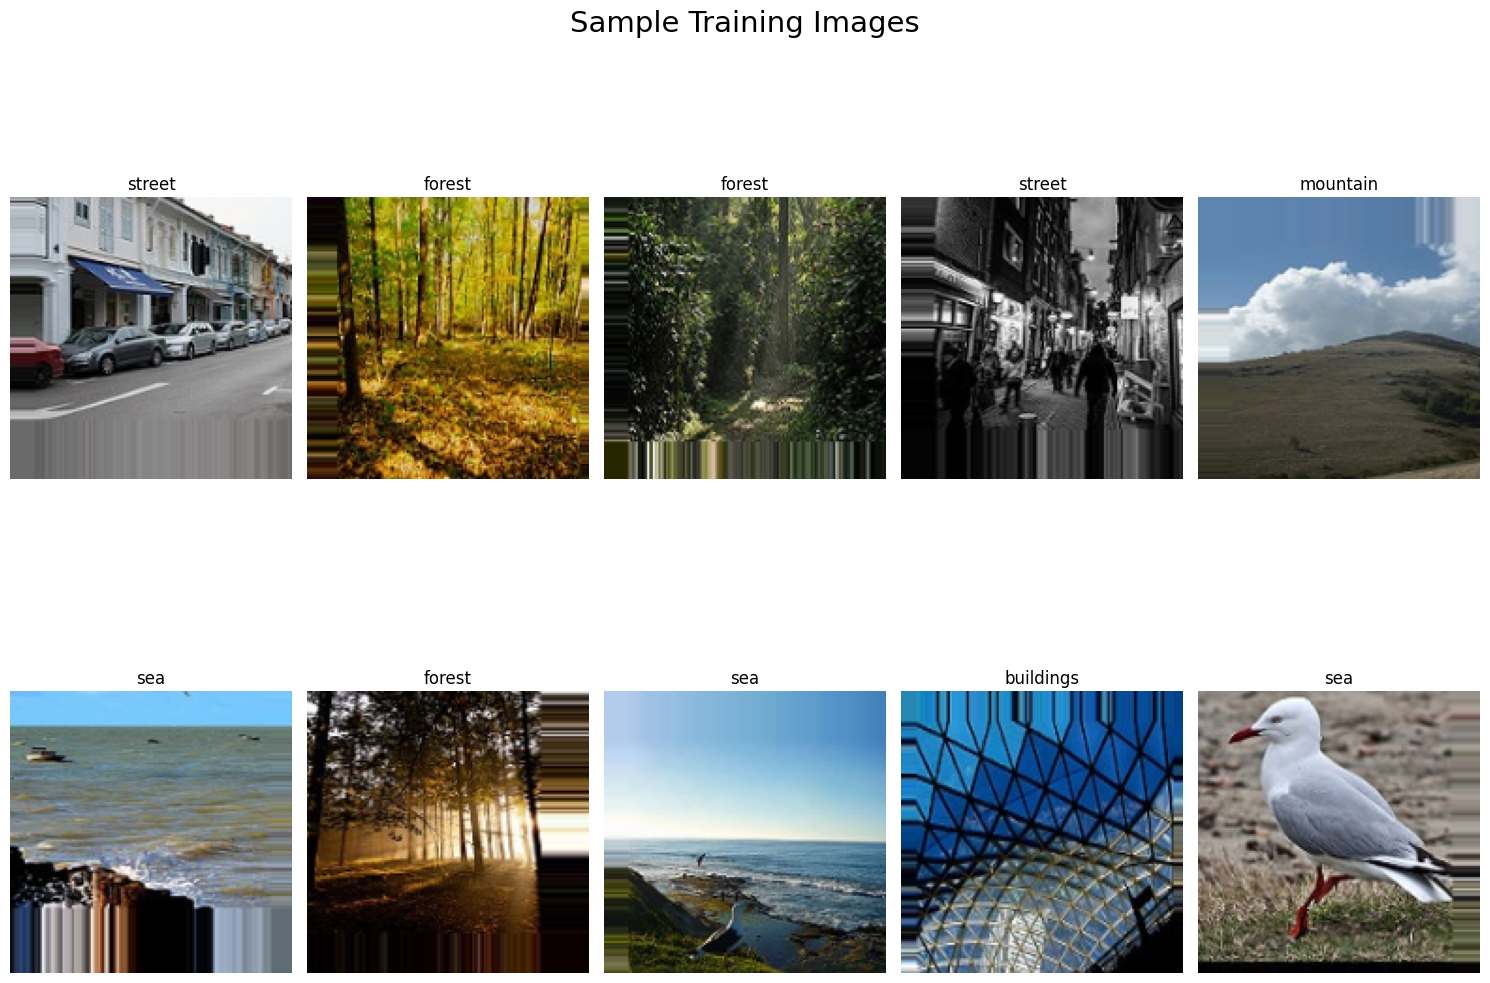

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

**Creating/Defining a Model**

Here we are defining our model shape, how it looks like?

In [14]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])
    
    return model


In this cell 

In [15]:
cnn_model = create_model()

In [16]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     9728      
                                                                 
 activation (Activation)     (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 73, 73, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 71, 71, 64)        0

In [17]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [18]:
optimizer = Adam(learning_rate=0.001)

In [19]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [20]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50


I0000 00:00:1706926928.281453     242 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 - 172s - loss: 2.0459 - accuracy: 0.4939 - val_loss: 1.6588 - val_accuracy: 0.4263 - lr: 0.0010 - 172s/epoch - 393ms/step
Epoch 2/50
439/439 - 83s - loss: 1.1084 - accuracy: 0.5945 - val_loss: 0.9174 - val_accuracy: 0.6613 - lr: 0.0010 - 83s/epoch - 190ms/step
Epoch 3/50
439/439 - 84s - loss: 0.9340 - accuracy: 0.6577 - val_loss: 0.7869 - val_accuracy: 0.7237 - lr: 0.0010 - 84s/epoch - 191ms/step
Epoch 4/50
439/439 - 84s - loss: 0.8691 - accuracy: 0.6903 - val_loss: 0.7872 - val_accuracy: 0.7007 - lr: 0.0010 - 84s/epoch - 191ms/step
Epoch 5/50
439/439 - 84s - loss: 0.7906 - accuracy: 0.7179 - val_loss: 0.6483 - val_accuracy: 0.7670 - lr: 0.0010 - 84s/epoch - 191ms/step
Epoch 6/50
439/439 - 83s - loss: 0.7410 - accuracy: 0.7376 - val_loss: 0.7966 - val_accuracy: 0.7503 - lr: 0.0010 - 83s/epoch - 189ms/step
Epoch 7/50
439/439 - 84s - loss: 0.6775 - accuracy: 0.7633 - val_loss: 0.6720 - val_accuracy: 0.7897 - lr: 0.0010 - 84s/epoch - 190ms/step
Epoch 9/50
439/439 - 84s - loss: 0.6

In [22]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

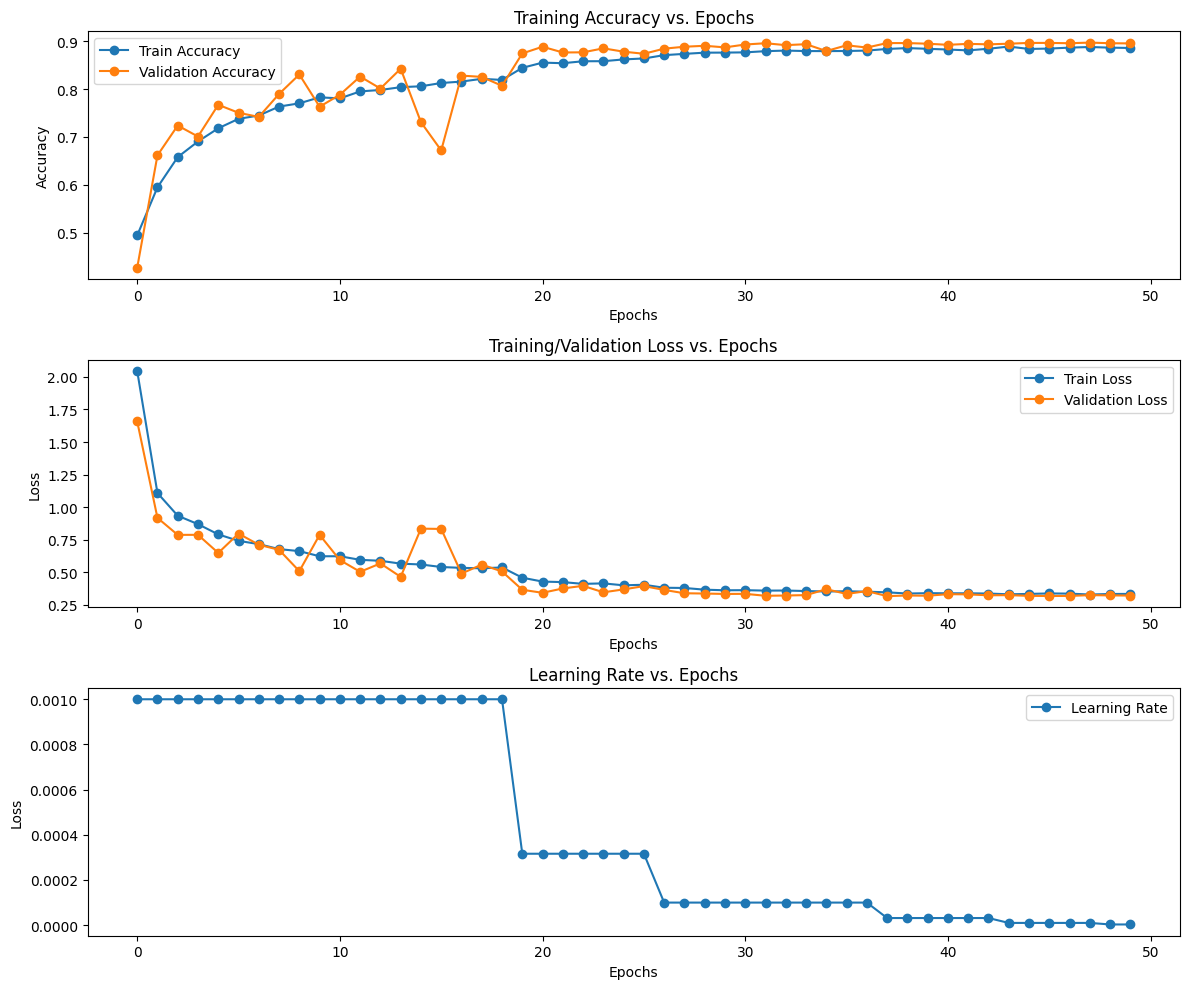

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [24]:
test_dataset = '/kaggle/input/intel-image-classification/seg_test/seg_test/'

In [25]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [26]:
predictions = cnn_model.predict(test_generator)

94/94 [==============================] - 5s 47ms/step


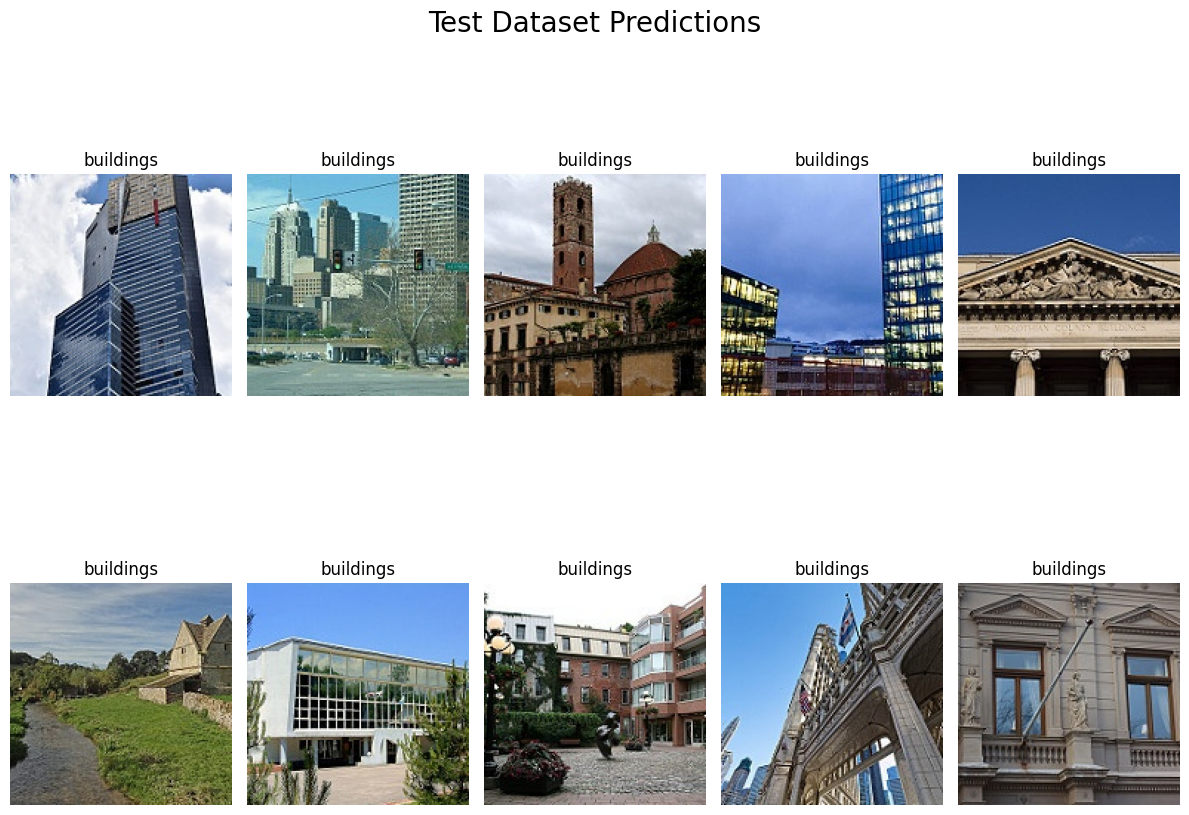

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [28]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

94/94 [==============================] - 4s 45ms/step - loss: 0.3207 - accuracy: 0.8953


In [29]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.32074907422065735
Test Accuracy: 0.8953333497047424


In [30]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

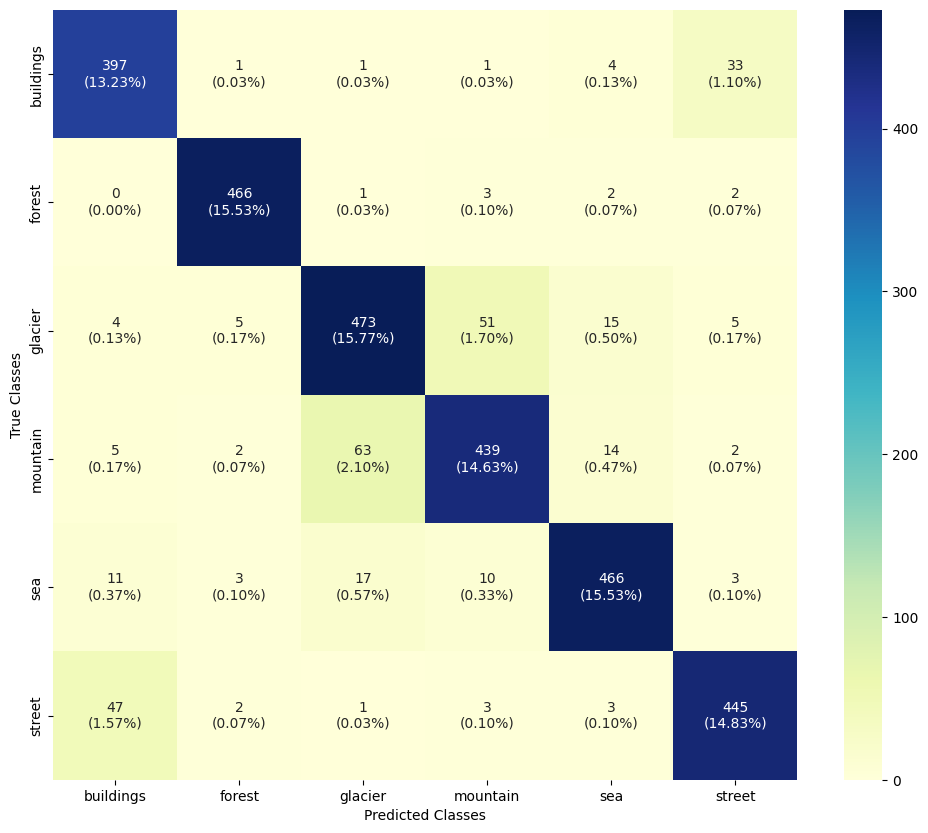

In [31]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [32]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

   buildings       0.86      0.91      0.88       437
      forest       0.97      0.98      0.98       474
     glacier       0.85      0.86      0.85       553
    mountain       0.87      0.84      0.85       525
         sea       0.92      0.91      0.92       510
      street       0.91      0.89      0.90       501

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



**Lets Do Some Live predictions**

Prediction No. 1 

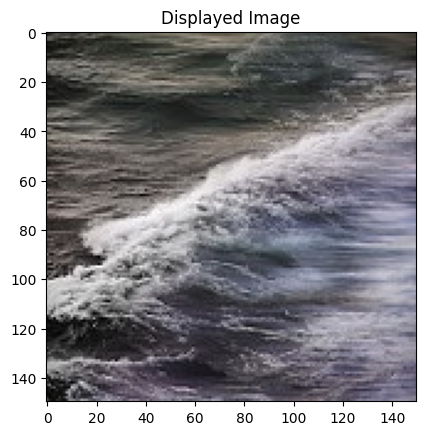

1/1 [==============================] - 0s 18ms/step
<class 'numpy.ndarray'>
Predictions: 4
Rate of Predictions: [[6.6639085e-09 7.9867405e-08 2.0572614e-04 2.3835762e-06 9.9979156e-01
  2.0290599e-07]]
The Predicted Class is : Sea


In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

# Assuming your trained model is stored in the variable 'model'

# Load an image from file
img_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10069.jpg'  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(150, 150))  # Adjust target_size based on your model's input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (required by the model)

plt.imshow(img)
plt.title('Displayed Image')
plt.show()

# Normalize the image data
img_array = img_array / 255.0  # Assuming you used normalization during training

# Make the prediction
predictions = cnn_model.predict(img_array)

# If you have a binary classification (sigmoid activation in the last layer)


# If you have multiple classes (softmax activation in the last layer)
class_probabilities = predictions[0]
predicted_class_index = np.argmax(predictions[0])
print (type(class_probabilities))
# Print the result
print("Predictions:", predicted_class_index)
print("Rate of Predictions:", predictions)
if predicted_class_index==0:
    print ("The Predicted Class is : Building")
elif predicted_class_index==1:
     print ("The Predicted Class is : Forrest")
elif predicted_class_index==2:
     print ("The Predicted Class is : Glacier")
elif predicted_class_index==3:
     print ("The Predicted Class is : Mountain")
elif predicted_class_index==4:
     print ("The Predicted Class is : Sea")
elif predicted_class_index==5:
     print ("The Predicted Class is : Street")




Prediction No. 2

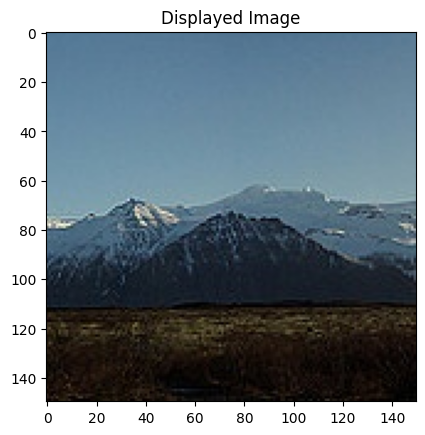

1/1 [==============================] - 0s 18ms/step
<class 'numpy.ndarray'>
Predictions: 3
Rate of Predictions: [[5.2038979e-07 7.3924753e-08 7.3020946e-04 9.9926907e-01 6.7634581e-08
  5.1624083e-10]]
The Predicted Class is : Mountain


In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

# Assuming your trained model is stored in the variable 'model'

# Load an image from file
img_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10096.jpg'  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(150, 150))  # Adjust target_size based on your model's input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (required by the model)

plt.imshow(img)
plt.title('Displayed Image')
plt.show()

# Normalize the image data
img_array = img_array / 255.0  # Assuming you used normalization during training

# Make the prediction
predictions = cnn_model.predict(img_array)

# If you have a binary classification (sigmoid activation in the last layer)


# If you have multiple classes (softmax activation in the last layer)
class_probabilities = predictions[0]
predicted_class_index = np.argmax(predictions[0])
print (type(class_probabilities))
# Print the result
print("Predictions:", predicted_class_index)
print("Rate of Predictions:", predictions)
if predicted_class_index==0:
    print ("The Predicted Class is : Building")
elif predicted_class_index==1:
     print ("The Predicted Class is : Forrest")
elif predicted_class_index==2:
     print ("The Predicted Class is : Glacier")
elif predicted_class_index==3:
     print ("The Predicted Class is : Mountain")
elif predicted_class_index==4:
     print ("The Predicted Class is : Sea")
elif predicted_class_index==5:
     print ("The Predicted Class is : Street")



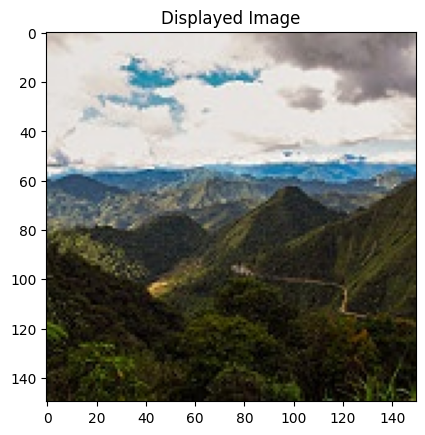

1/1 [==============================] - 0s 19ms/step
<class 'numpy.ndarray'>
Predictions: 3
Rate of Predictions: [[3.3893775e-06 5.1513911e-05 9.0532780e-02 9.0940094e-01 1.1238638e-05
  1.5122085e-07]]
The Predicted Class is : Mountain


In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

# Assuming your trained model is stored in the variable 'model'

# Load an image from file
img_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10133.jpg'  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(150, 150))  # Adjust target_size based on your model's input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (required by the model)

plt.imshow(img)
plt.title('Displayed Image')
plt.show()

# Normalize the image data
img_array = img_array / 255.0  # Assuming you used normalization during training

# Make the prediction
predictions = cnn_model.predict(img_array)

# If you have a binary classification (sigmoid activation in the last layer)


# If you have multiple classes (softmax activation in the last layer)
class_probabilities = predictions[0]
predicted_class_index = np.argmax(predictions[0])
print (type(class_probabilities))
# Print the result
print("Predictions:", predicted_class_index)
print("Rate of Predictions:", predictions)
if predicted_class_index==0:
    print ("The Predicted Class is : Building")
elif predicted_class_index==1:
     print ("The Predicted Class is : Forrest")
elif predicted_class_index==2:
     print ("The Predicted Class is : Glacier")
elif predicted_class_index==3:
     print ("The Predicted Class is : Mountain")
elif predicted_class_index==4:
     print ("The Predicted Class is : Sea")
elif predicted_class_index==5:
     print ("The Predicted Class is : Street")


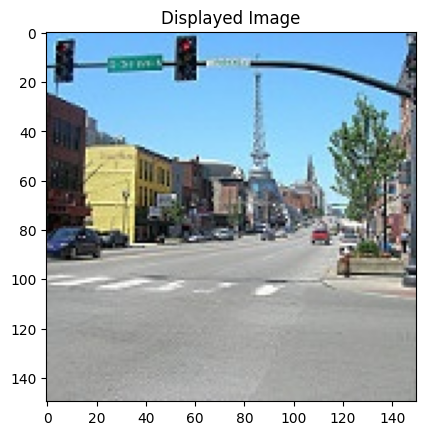

1/1 [==============================] - 0s 18ms/step
<class 'numpy.ndarray'>
Predictions: 5
Rate of Predictions: [[2.3967814e-02 6.0418103e-08 1.5363679e-06 3.4326000e-08 2.3586863e-07
  9.7603035e-01]]
The Predicted Class is : Street


In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

# Assuming your trained model is stored in the variable 'model'

# Load an image from file
img_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10199.jpg'  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(150, 150))  # Adjust target_size based on your model's input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (required by the model)

plt.imshow(img)
plt.title('Displayed Image')
plt.show()

# Normalize the image data
img_array = img_array / 255.0  # Assuming you used normalization during training

# Make the prediction
predictions = cnn_model.predict(img_array)

# If you have a binary classification (sigmoid activation in the last layer)


# If you have multiple classes (softmax activation in the last layer)
class_probabilities = predictions[0]
predicted_class_index = np.argmax(predictions[0])
print (type(class_probabilities))
# Print the result
print("Predictions:", predicted_class_index)
print("Rate of Predictions:", predictions)
if predicted_class_index==0:
    print ("The Predicted Class is : Building")
elif predicted_class_index==1:
     print ("The Predicted Class is : Forrest")
elif predicted_class_index==2:
     print ("The Predicted Class is : Glacier")
elif predicted_class_index==3:
     print ("The Predicted Class is : Mountain")
elif predicted_class_index==4:
     print ("The Predicted Class is : Sea")
elif predicted_class_index==5:
     print ("The Predicted Class is : Street")